In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, accuracy_score

## Вопрос 1-8

In [122]:
df = pd.read_csv('music_prepared.csv')
df.sample(n=5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4858,56,203583,False,0.753,0.529,5,-8.515,0,0.2080,0.5510,0.000082,0.1150,0.381,86.017,4,4.0
2090,9,231124,False,0.632,0.773,6,-4.856,1,0.0346,0.0623,0.000000,0.0885,0.474,130.033,4,2.0
4423,30,309320,False,0.514,0.605,9,-6.754,1,0.0369,0.6360,0.000003,0.4180,0.204,133.269,4,4.0
2007,75,131077,False,0.847,0.558,8,-5.855,0,0.0663,0.3250,0.000000,0.1350,0.495,98.062,4,2.0
448,0,168280,False,0.671,0.689,9,-7.755,1,0.0932,0.3280,0.000003,0.3520,0.811,138.306,4,0.0


In [125]:
X = df[df.columns[1:]]
y = np.array(df["popularity"]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=1)

print(X_train.shape, X_test.shape, y_train.shape)

d3 = DecisionTreeRegressor(random_state=1)
d3.fit(X_train, y_train.ravel())
y_train_pred = d3.predict(X_train)
print("RMSE =", mean_squared_error(y_train, y_train_pred, squared=True))
y_test_pred = d3.predict(X_test)
rmse_d3 = mean_squared_error(y_test, y_test_pred, squared=True)
print("RMSE =", rmse_d3)

(4000, 15) (1000, 15) (4000, 1)
RMSE = 20.26219201619459
RMSE = 882.1089755234448


In [126]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train.ravel())
y_train_pred = rf.predict(X_train)
print("RMSE =", mean_squared_error(y_train, y_train_pred, squared=True))
y_test_pred = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_test_pred, squared=True)
print("RMSE =", rmse_rf)
print("diff between RMSE of d3 and rf =", round(rmse_d3-rmse_rf, 2))

RMSE = 84.03540976776642
RMSE = 514.92633631183
diff between RMSE of d3 and rf = 367.18


[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49]


100%|██████████| 17/17 [01:13<00:00,  4.35s/it]


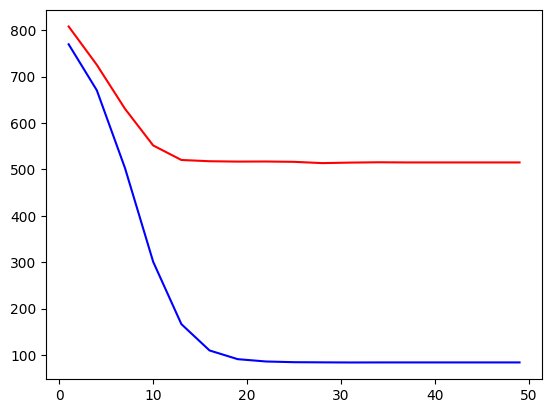

In [108]:
rmse_train, rmse_test = [], []
x_axis = np.arange(1, 50, 3)
print(x_axis)
for i in tqdm(range(1, 50, 3)):
    rf = RandomForestRegressor(random_state=1, max_depth=i)
    rf.fit(X_train, y_train.ravel())
    y_train_pred = rf.predict(X_train)
    rmse_train.append(mean_squared_error(y_train, y_train_pred, squared=True))
    #print("RMSE =", mean_squared_error(y_train, y_train_pred, squared=True))
    y_test_pred = rf.predict(X_test)
    rmse_test.append(mean_squared_error(y_test, y_test_pred, squared=True))
    #print("RMSE =", rmse_rf)

plt.plot(x_axis, rmse_train, color = "b")
plt.plot(x_axis, rmse_test, color = "r")
plt.grid()

In [128]:
y_train_bin = np.array([[1 if x>50 else 0 for x in y_train]]).reshape(-1,1)
y_test_bin = np.array([[1 if x>50 else 0 for x in y_test]]).reshape(-1,1)

In [129]:
d3_clf = DecisionTreeClassifier(random_state=1, max_depth = 17)
d3_clf.fit(X_train, y_train_bin)
d3_clf_test_accuracy = d3_clf.score(X_test, y_test_bin)
print(f"accuracy on TRAIN = {d3_clf.score(X_train, y_train_bin)}, on TEST =  {d3_clf_test_accuracy}")

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train_bin.ravel())
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test_bin, y_test_pred)
print("rf accuracy TRAIN =", accuracy_score(y_train_bin, y_train_pred),"TEST =", rf_test_accuracy)
print("diff between accuracy of d3 and rf =", round(rf_test_accuracy-d3_clf_test_accuracy, 2))

accuracy on TRAIN = 0.9805, on TEST =  0.698
rf accuracy TRAIN = 0.9935 TEST = 0.777
diff between accuracy of d3 and rf = 0.08


100%|██████████| 15/15 [00:15<00:00,  1.01s/it]


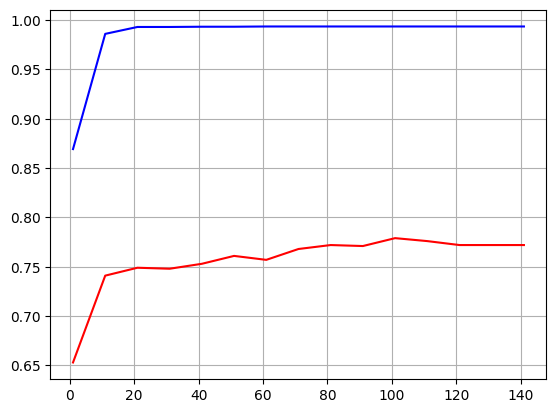

In [130]:
accuracy_train, accuracy_test = [], []
x_axis = np.arange(1, 150, 10)
for i in tqdm(range(1, 150, 10)):
    rf = RandomForestClassifier(random_state=1, n_estimators=i)
    rf.fit(X_train, y_train_bin.ravel())
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train_bin, y_train_pred))
    accuracy_test.append(accuracy_score(y_test_bin, y_test_pred))

plt.plot(x_axis, accuracy_train, color = "b")
plt.plot(x_axis, accuracy_test, color = "r")
plt.grid()

## Making RandomForest by hands

In [137]:
np.random.seed(42)  # для фиксации случайности

def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):
        data = data.copy().values  # перевод таблицы в numpy array

    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.copy().values  # перевод целевого признака в numpy array

    n_samples = int(data.shape[0]*max_samples)  # подсчет кол-ва объектов в подвыборках
    bootstrap = []  # список для будущих подвыборок

    for i in range(n):

        sample_index = np.random.randint(0, data.shape[0], size = n_samples) # взятие случайных индексов в кол-ве n_samples
        b_data = np.array([data[i] for i in sample_index])  # взятие объектов по выбранным индексам
        b_labels = np.array([labels[i] for i in sample_index])  # взятие целевых значений по выбранным индексам

        bootstrap.append((b_data, b_labels))  # добавление в список подвыборок

    return bootstrap

data = get_bootstrap(X_train, y_train_bin.ravel(), n=3, max_samples=0.01)
print(sum(data[0][1]))

12


In [138]:
np.random.seed(42)  # для фиксации случайности

def get_subsample(features, max_features=1.0):
    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array

    len_features = int(len(features)*max_features)  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайных индексов признаков
        sample_indexes,
        size=len_features,  # в кол-ве len_features
        replace=False  # без повторений
    )

    return features[subsample]  # на список выходе признаки

sample_features = df.columns[1:]
print(get_subsample(sample_features, max_features=0.1))


['instrumentalness']


In [144]:
np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = get_bootstrap(X_train, y_train_bin.ravel(), n=100, max_samples=0.5)  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)
    features = get_subsample(sample_features, max_features=0.5)  # получаем признаки

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

print(len(forest))
forest[0].get_depth()

100


23

In [146]:
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    predictions.append(tree.predict(X_test[tree.feature_names_in_]))

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))


# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append(round(sum(obj)/len(obj)))

print(round( accuracy_score(y_test_bin, voted_predictions), 2))


0.76
